<a href="https://colab.research.google.com/github/Romal27/ML_CW/blob/main/ML_CW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd

# Loading the dataset
data = pd.read_csv('bank-full.csv', delimiter=';')  # Using ';' as the delimiter for this dataset
print("Dataset loaded successfully!")

# Displaying the first few rows to confirm successful loading
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")  # Printing dimensions
data.head()  # Show the first few rows



Dataset loaded successfully!
The dataset contains 45211 rows and 17 columns.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Summary Statistics for Numerical Columns:
                age        balance    

<ipython-input-26-0c4c9b89d896>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')


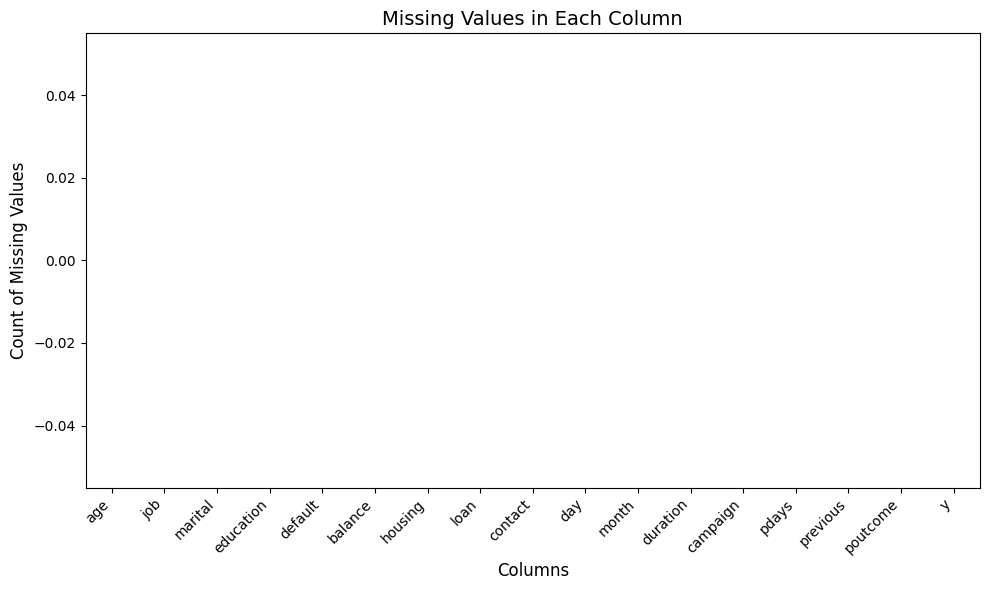

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Overview of the dataset
print("Dataset Overview:")
data.info()  # Display data types and non-null counts

# Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())

# Checking for missing values
print("\nMissing Values per Column:")
missing_values = data.isnull().sum()
print(missing_values)

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Missing Values in Each Column", fontsize=14)
plt.ylabel("Count of Missing Values", fontsize=12)
plt.xlabel("Columns", fontsize=12)
plt.tight_layout()
plt.show()



Target variable 'y' converted to binary format.


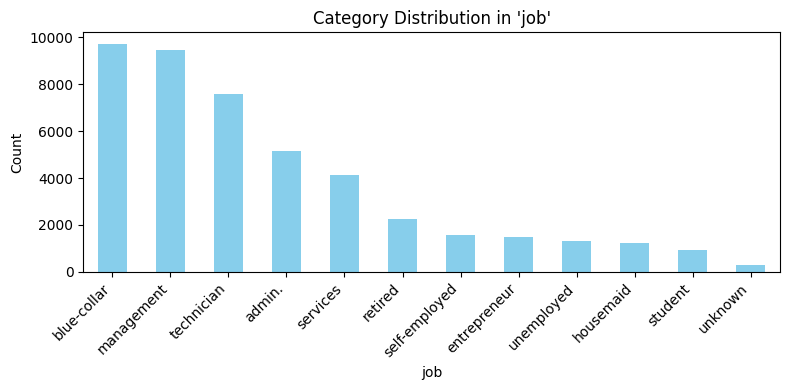

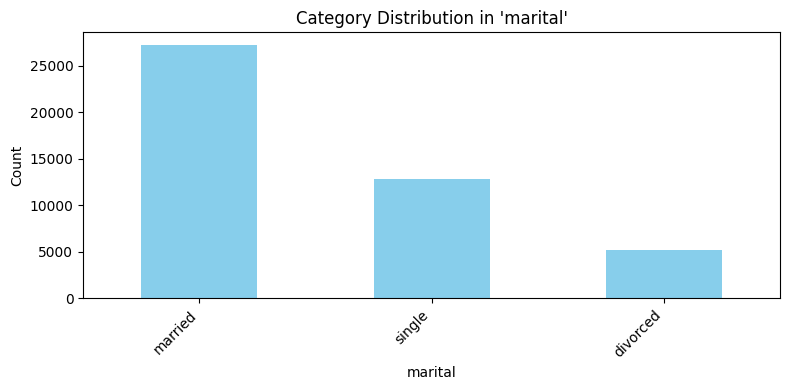

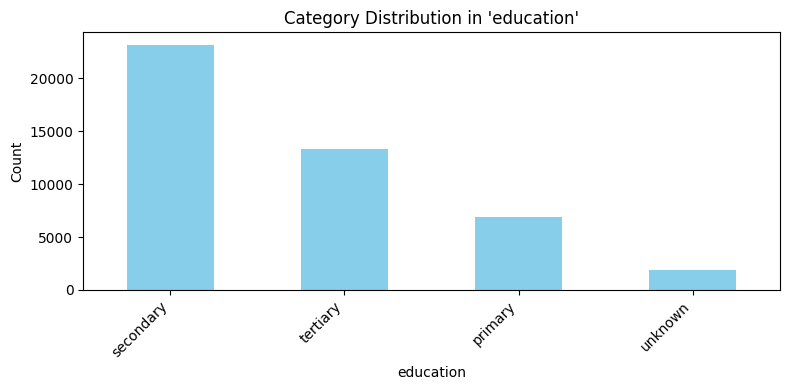

Categorical variables encoded successfully! The dataset now contains 43 features.


,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True


In [27]:
# Step 1: Converting the target variable 'y' into binary format
data['y'] = data['y'].map({'yes': 1, 'no': 0})
print("Target variable 'y' converted to binary format.")

# Step 2: List of categorical columns to encode
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Visualizing category proportions before encoding
for col in categorical_columns[:3]:  # Visualizing the first 3 for simplicity
    plt.figure(figsize=(8, 4))
    data[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f"Category Distribution in '{col}'")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Step 3: Create dummy variables for categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
print(f"Categorical variables encoded successfully! The dataset now contains {data_encoded.shape[1]} features.")

# Displaying the first few rows of the encoded dataset
data_encoded.head()



In [28]:
from sklearn.model_selection import train_test_split

# Step 1: Defining features (X) and target (y)
X = data_encoded.drop('y', axis=1)  # Features: All columns except 'y'
y = data_encoded['y']               # Target: 'y' column

# Step 2: Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset successfully split into training and testing sets!")

# Step 3: Displaying dataset sizes
print(f"Training set size: {X_train.shape[0]} samples, {X_train.shape[1]} features")
print(f"Testing set size: {X_test.shape[0]} samples, {X_test.shape[1]} features")

# Step 4: Check class distribution in the training and testing sets
train_class_distribution = y_train.value_counts(normalize=True) * 100
test_class_distribution = y_test.value_counts(normalize=True) * 100

print("\nClass Distribution in Training Set:")
print(train_class_distribution)
print("\nClass Distribution in Testing Set:")
print(test_class_distribution)


Dataset successfully split into training and testing sets!
Training set size: 36168 samples, 42 features
Testing set size: 9043 samples, 42 features

Class Distribution in Training Set:
y
0    88.393055
1    11.606945
Name: proportion, dtype: float64

Class Distribution in Testing Set:
y
0    87.93542
1    12.06458
Name: proportion, dtype: float64


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Defining the Neural Network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer matching feature count
    Dense(32, activation='relu'),     # First hidden layer with 32 neurons
    Dense(16, activation='relu'),     # Second hidden layer with 16 neurons
    Dense(1, activation='sigmoid')    # Output layer for binary classification
])


In [30]:
# Step 2: Ensure the data is in compatible format
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [31]:
# Step 3: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10, batch_size=32, verbose=1
)

# Step 5: Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Step 6: Predicting on the test set
y_pred_proba = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_proba > 0.5).astype('int')  # Convert probabilities to binary predictions (0 or 1)

# Step 7: Calculating additional metrics
nn_precision = precision_score(y_test, y_pred)
nn_recall = recall_score(y_test, y_pred)
nn_f1 = f1_score(y_test, y_pred)

# Printing the additional metrics
print(f"Neural Network Precision (Class 1): {nn_precision:.2f}")
print(f"Neural Network Recall (Class 1): {nn_recall:.2f}")
print(f"Neural Network F1-Score (Class 1): {nn_f1:.2f}")

# Step 8: Plotted training and validation loss/accuracy
# Extracting metrics from training history
epochs = range(1, len(history.history['accuracy']) + 1)

Epoch 1/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8160 - loss: 8.0660 - val_accuracy: 0.7441 - val_loss: 1.1781
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8673 - loss: 0.5535 - val_accuracy: 0.8796 - val_loss: 1.3789
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8694 - loss: 0.5774 - val_accuracy: 0.8869 - val_loss: 0.3245
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8726 - loss: 0.5566 - val_accuracy: 0.8747 - val_loss: 0.3368
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8778 - loss: 0.4656 - val_accuracy: 0.8785 - val_loss: 0.3756
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8843 - loss: 0.4265 - val_accuracy: 0.8956 - val_loss: 0.3031
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8842 - loss: 0.4025 - val_accuracy: 0.8879 - val_loss: 0.4294
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8860 - loss: 0.3675 - 

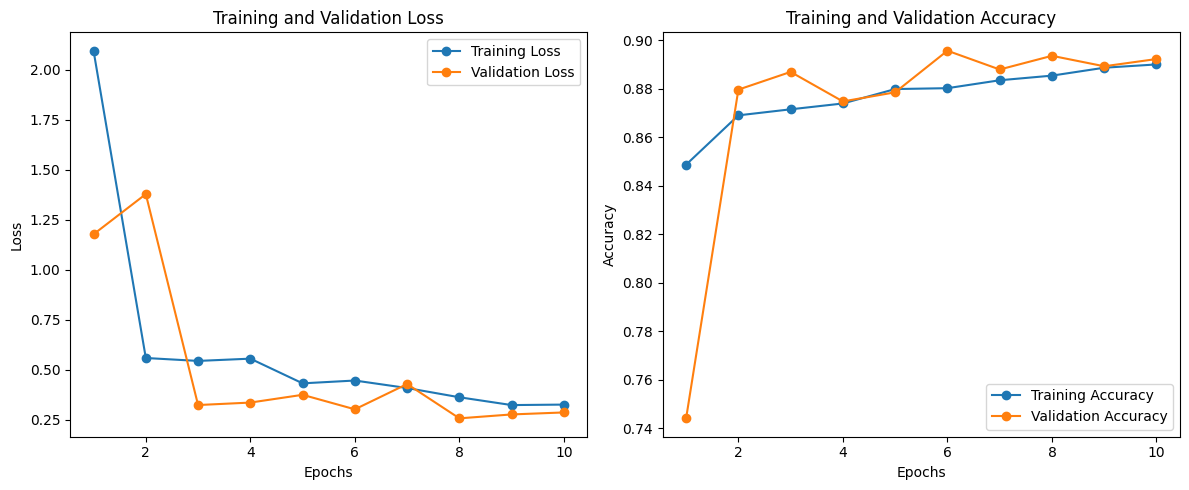

In [32]:
plt.figure(figsize=(12, 5))
# Subplot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history.history['loss'], label='Training Loss', marker='o')
plt.plot(epochs, history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(epochs, history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Random Forest model trained successfully!
Random Forest Test Accuracy: 0.90

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.97      0.95      7952
         1.0       0.67      0.40      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.80      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



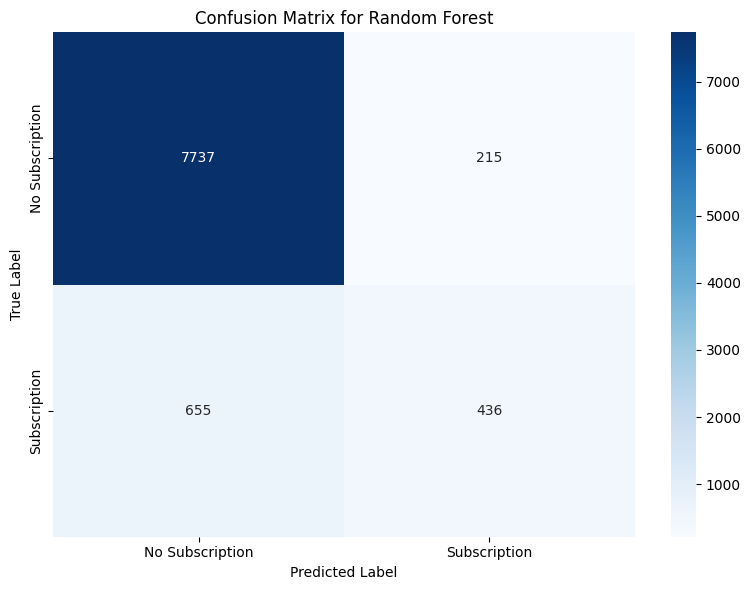

<ipython-input-33-b6d1803f9c50>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sorted_feature_importances[:10], y=sorted_feature_names[:10], palette='viridis')


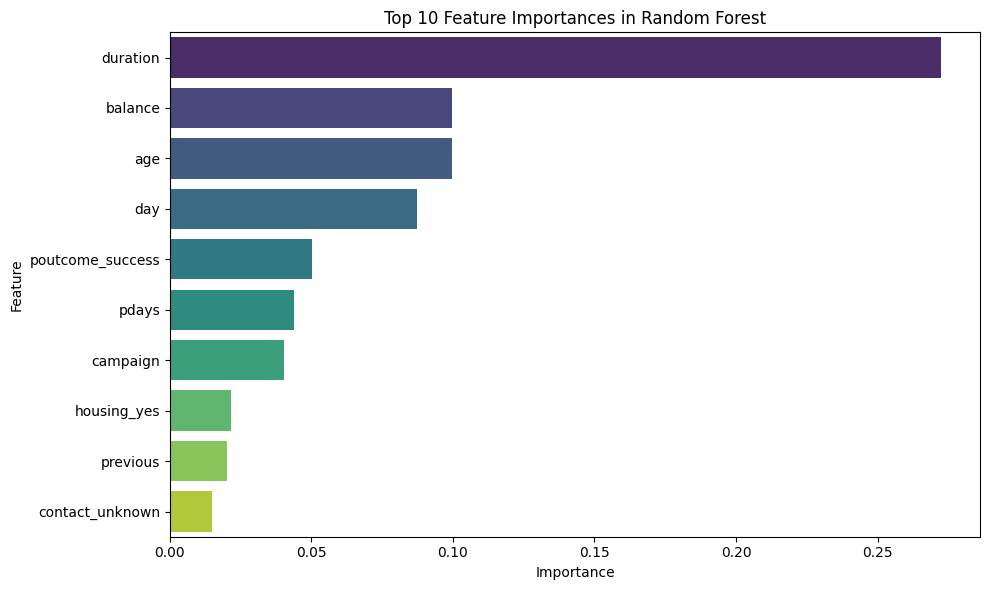

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Defining the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees, reproducible results

# Step 2: Train the model
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully!")

# Step 3: Predict on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Test Accuracy: {rf_accuracy:.2f}")

# Print classification report (precision, recall, F1-score for both classes)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 5: Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Subscription', 'Subscription'], yticklabels=['No Subscription', 'Subscription'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Step 6: Feature importance
# Extracting and visualizing the feature importances
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Sorting features by importance
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plotting top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_feature_importances[:10], y=sorted_feature_names[:10], palette='viridis')
plt.title('Top 10 Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()



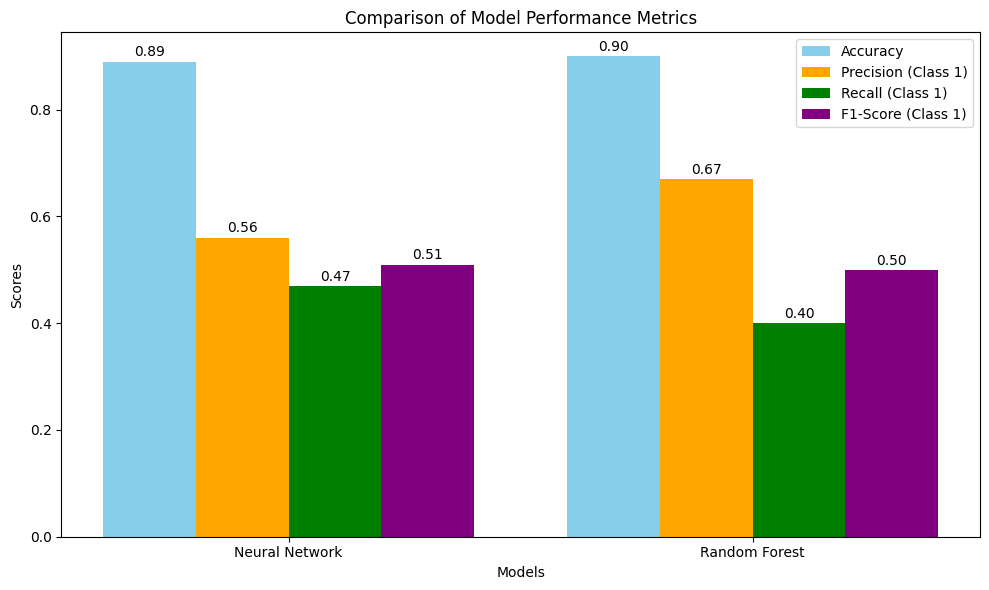

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Defining the metrics for both models
# Test Accuracy: Overall accuracy for the test dataset
neural_network_accuracy = 0.89  # From Neural Network output
random_forest_accuracy = 0.90  # From Random Forest output

# Precision for the positive class (class 1)
neural_network_precision_class1 = 0.56  # From Neural Network output
random_forest_precision_class1 = 0.67  # From Random Forest output

# Recall for the positive class (class 1)
neural_network_recall_class1 = 0.47  # From Neural Network output
random_forest_recall_class1 = 0.40  # From Random Forest output

# F1-Score for the positive class (class 1)
neural_network_f1_class1 = 0.51  # From Neural Network output
random_forest_f1_class1 = 0.50  # From Random Forest output

# Combined all metrics into lists for visualization
models = ['Neural Network', 'Random Forest']
accuracy = [neural_network_accuracy, random_forest_accuracy]
precision_class1 = [neural_network_precision_class1, random_forest_precision_class1]
recall_class1 = [neural_network_recall_class1, random_forest_recall_class1]
f1_class1 = [neural_network_f1_class1, random_forest_f1_class1]

# Define positions for the bars in the bar chart
x = np.arange(len(models))  # Creates [0, 1] for the x-axis
width = 0.2  # Width of each bar in the chart

# Start creating the bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size for better visibility

# Plot accuracy bars
ax.bar(x - width, accuracy, width, label='Accuracy', color='skyblue')  # Shift bars to the left
# Plot precision bars
ax.bar(x, precision_class1, width, label='Precision (Class 1)', color='orange')  # Centered bars
# Plot recall bars
ax.bar(x + width, recall_class1, width, label='Recall (Class 1)', color='green')  # Shift bars to the right
# Plot F1-score bars
ax.bar(x + 2 * width, f1_class1, width, label='F1-Score (Class 1)', color='purple')  # Further right

# Adding labels on top of bars for better readability
for i in range(len(models)):
    ax.text(i - width, accuracy[i] + 0.01, f"{accuracy[i]:.2f}", ha='center', fontsize=10)
    ax.text(i, precision_class1[i] + 0.01, f"{precision_class1[i]:.2f}", ha='center', fontsize=10)
    ax.text(i + width, recall_class1[i] + 0.01, f"{recall_class1[i]:.2f}", ha='center', fontsize=10)
    ax.text(i + 2 * width, f1_class1[i] + 0.01, f"{f1_class1[i]:.2f}", ha='center', fontsize=10)

# Adding labels and title to the plot for better understanding
ax.set_xlabel('Models')  # X-axis label
ax.set_ylabel('Scores')  # Y-axis label
ax.set_title('Comparison of Model Performance Metrics')  # Title of the chart
ax.set_xticks(x + width / 2)  # Position x-ticks in the middle of the bars
ax.set_xticklabels(models)  # Set model names as x-tick labels
ax.legend()  # Add legend to explain the colors

# Finalize the layout and show the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the chart
